In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

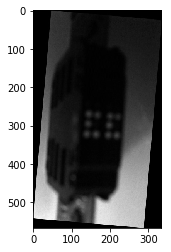

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(567, 334)


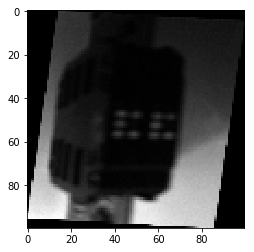

(100, 100)


In [2]:
DATADIR="/Users/shivam/Desktop/Academics/Projects/RBD_Testing/imagesd"

for img in os.listdir(DATADIR):  # iterate over each image per dogs and cats
    img_array = cv2.imread(os.path.join(DATADIR,img) ,0)  # convert to array
    plt.imshow(img_array,cmap="gray")  # graph it
    plt.show()  # display!

    break  # we just want one for now so break
    
print(img_array)
print(img_array.shape)

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

print(new_array.shape)

In [3]:
training_data=[]
def create_training_data():
    for img in tqdm(os.listdir(DATADIR)):  # iterate over each image
        ind=img.find("_",9)
        class_num=int(img[9:ind])
        try:
                img_array = cv2.imread(os.path.join(DATADIR,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
            
create_training_data()

print(len(training_data))
    
    

100%|██████████| 11526/11526 [02:25<00:00, 79.02it/s]

11526


In [4]:
import random

random.shuffle(training_data)
print(training_data[:10])

[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 88], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 49], [array([[135, 132, 129, ...,  87,  78,  98],
       [136, 132, 131, ..., 103,  88,  67],
       [133, 130, 131, ..., 117, 113, 104],
       ...,
       [254, 254, 254, ..., 255, 254, 252],
       [254, 254, 254, ..., 253, 253, 252],
       [254, 254, 254, ..., 253, 252, 250]], dtype=uint8), 136], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 187], [array([[0, 0, 0, ..., 0,

In [5]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) #input to network needs to be in this shape because of Keras

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [6]:
import pickle  #save the cureent data

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

name="RBD-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(name))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = tf.keras.utils.normalize(X, axis=1)
y= to_categorical(y)
model = Sequential()

model.add(Conv2D(64, (3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=8, validation_split=0.3,callbacks=[tensorboard])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Train on 8068 samples, validate on 3458 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/8
8068/8068 [==============================] - 246s 31ms/sample - loss: 5.0849 - acc: 0.0418 - val_loss: 2.8599 - val_acc: 0.2993
Epoch 2/8
8068/8068 [==============================] - 227s 28ms/sample - loss: 1.0632 - acc: 0.7081 - val_loss: 0.3062 - val_acc: 0.9121
Epoch 3/8
8068/8068 [==============================] - 210s 26ms/sample - loss: 0.1398 - acc: 0.9605 - val_loss: 0.0875 - val_acc: 0.9734
Epoch 4/8
8068/8068 [==============================] - 588s 73ms/sample - loss: 0.0517 - acc: 0.9879 - val_loss: 0.0501 - val_acc: 0.9879
Epoch 5/8
8068/8068 [==============================] - 213s 26ms/sample - loss: 0.0378 - acc: 0.9908 - val_loss: 0.0569 - val_acc: 0.9853
Epoch 6/8
8068/8068 [==============================] - 208s 26ms/sample - loss: 0.0167 - acc: 0.9965 - val_loss: 0.0212 - val_acc: 0.9948
Epoc

In [9]:
# predictions = model.predict(X_test)
# val=tf.argmax(predictions[0],0)
# session = tf.Session()
# # Find minimum in vector.
# print(session.run(val))

# model.save('RBD-5.model')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
__________

In [1]:
from tqdm import tqdm
import os
import cv2

IMG_SIZE=100
test_data=[]
TDATADIR="/Users/shivam/Desktop/Academics/Projects/RBD_Testing/test_images"
def create_test_data():
    for img in tqdm(os.listdir(TDATADIR)):  # iterate over each image
        ind=img.find("_",9)
        class_num=int(img[9:ind])
        img_array = cv2.imread(os.path.join(TDATADIR,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        new_array.shape
        test_data.append([new_array, class_num])  # add this to our training_data
            
create_test_data()

print((test_data[0:10]))

100%|██████████| 768/768 [00:08<00:00, 93.63it/s] 

[[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 131], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 231], [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 151], [array([[239, 240, 240, ...,  26,  29,  27],
       [242, 240, 236, ...,  14,  17,  20],
       [239, 236, 234, ...,  15,  11,  14],
       ...,
       [255, 255, 254, ..., 206, 173, 178],
       [255, 255, 255, ..., 215, 178, 180],
       [255, 255, 254, ..., 215, 174, 176]], dtype=uint8), 4], [array([[0, 0, 0, ..., 0,

In [2]:
X_test = []
y_test = []
import numpy as np
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[4].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) #input to network needs to be in this shape because of Keras

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [3]:
import tensorflow as tf
new_model=tf.keras.models.load_model('RBD-1.model')
pred= new_model.predict(X_test)
val=tf.argmax(pred[48],0)
session = tf.Session()
# Find minimum in vector.
print(session.run(val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
197


In [5]:
pred= new_model.predict(X_test)
val=tf.argmax(pred[50],0)
session = tf.Session()
# Find minimum in vector.
print(hex(session.run(val)))

0xb0


In [6]:
cv2.imshow('pred',X_test[50])
cv2.waitKey(0) 
cv2.destroyWindow('pred')